# Importing Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('train.csv')

## Data Visualisation and Data Cleaning

In [ ]:
# form correlation matrix
matrix = df.corr()
print("Correlation matrix is : ")
print(matrix)

Correlation matrix is : 
                 PRODUCT_ID  PRODUCT_TYPE_ID  PRODUCT_LENGTH
PRODUCT_ID         1.000000         0.250576        0.000424
PRODUCT_TYPE_ID    0.250576         1.000000        0.000961
PRODUCT_LENGTH     0.000424         0.000961        1.000000


In [ ]:
def IQR(df,variable):
    Q1=df[variable].quantile(0.25)
    Q3=df[variable].quantile(0.75)
    IQR=Q3-Q1
    lower_bridge=df[variable].quantile(0.25)-(IQR*1.5)
    upper_bridge=df[variable].quantile(0.75)+(IQR*1.5)
    df.loc[df[variable]>=upper_bridge,variable]=upper_bridge
    df.loc[df[variable]<=lower_bridge,variable]=lower_bridge

In [ ]:
numerical_features=[features for features in df.columns if df[features].dtypes!='O']


In [ ]:
IQR(df,'PRODUCT_LENGTH')

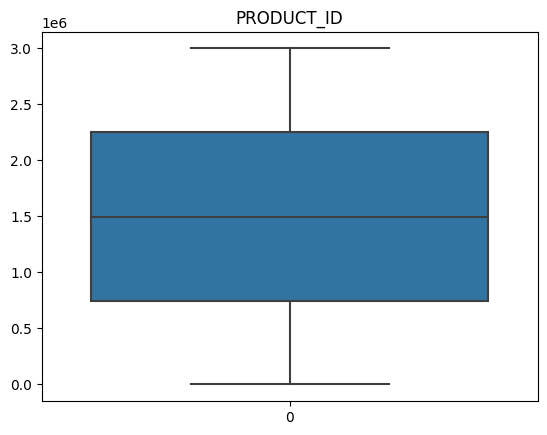

<Figure size 1500x1500 with 0 Axes>

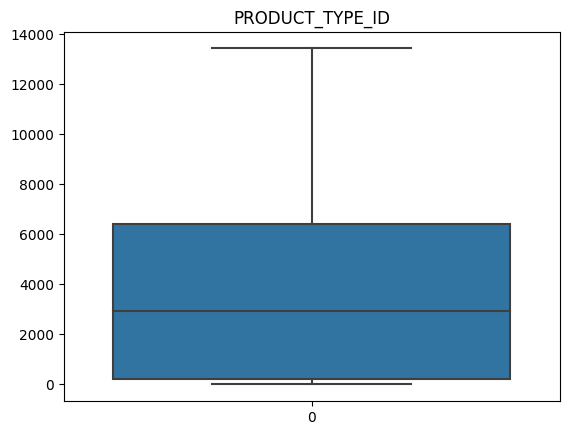

<Figure size 1500x1500 with 0 Axes>

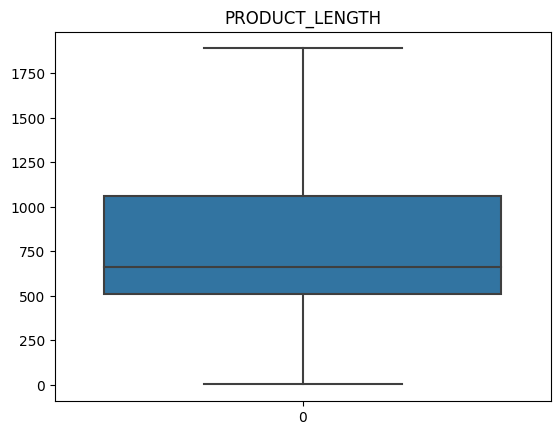

<Figure size 1500x1500 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
for feature in numerical_features:
  sns.boxplot(df[feature])
  plt.title(feature)
  plt.figure(figsize=(15,15))
  plt.show()

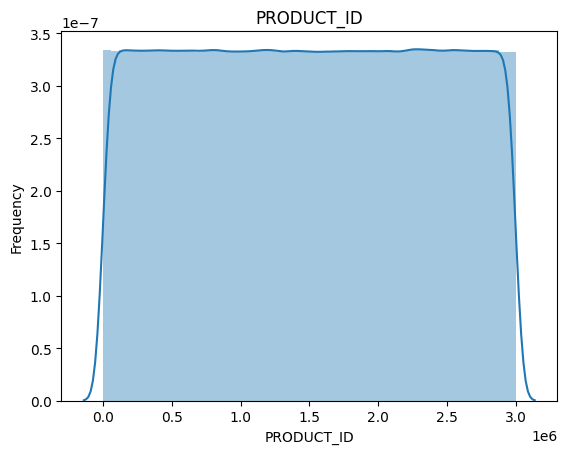

<Figure size 1500x1500 with 0 Axes>

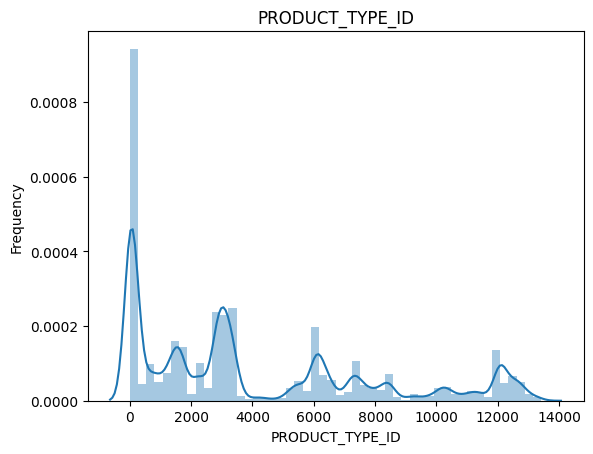

<Figure size 1500x1500 with 0 Axes>

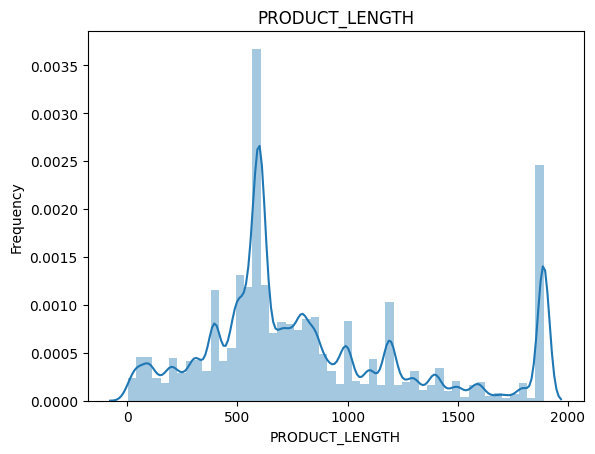

<Figure size 1500x1500 with 0 Axes>

In [ ]:
for feature in numerical_features:
  sns.distplot(df[feature])
  plt.xlabel(feature)
  plt.ylabel("Frequency")
  plt.title(feature)
  plt.figure(figsize=(15,15))
  plt.show()

In [ ]:
#Checking the missing values of dataframe
df.isnull().sum()

PRODUCT_ID               0
TITLE                   12
BULLET_POINTS       837364
DESCRIPTION        1157381
PRODUCT_TYPE_ID          0
PRODUCT_LENGTH           0
dtype: int64

# Model Training

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X=df.drop(columns=['TITLE','BULLET_POINTS', 'DESCRIPTION','PRODUCT_LENGTH'])
y=df['PRODUCT_LENGTH']
X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=104, test_size=0.2, shuffle=True)

model = RandomForestRegressor(random_state=0,n_estimators=50)
model.fit(X, y)

In [ ]:
test_df = pd.read_csv('test.csv')
X=test_df.drop(columns=['TITLE', 'BULLET_POINTS', 'DESCRIPTION'])

yhat = model.predict(X)
test_df['PRODUCT_LENGTH']=yhat
test_df=test_df.drop(columns=['TITLE', 'BULLET_POINTS', 'DESCRIPTION','PRODUCT_TYPE_ID'])

In [ ]:
# saving the dataframe
test_df.to_csv('RndmSubmission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>